In [10]:
# 'Pandas' is used for data manipulation and analysis
import pandas as pd

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

#reading the data
price_demand_data = pd.read_csv("price_demand_data.csv")
weather_data = pd.read_csv("weather_data.csv")

#displaying the first five records
price_demand_data.head()


,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW


In [2]:
price_demand_data.dtypes

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
PRICECATEGORY      object
dtype: object

In [11]:
weather_data.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,...,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,...,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,...,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,...,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


In [4]:
weather_data.dtypes

Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am cloud amount (oktas)               int64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)              int64
3pm cloud amount (oktas)             float64
3pm wind direction                    object
3pm wind speed (km/h)                 object
3pm MSL pressure (hPa)               float64
dtype: object

In [5]:
price_demand_data.loc[price_demand_data['SETTLEMENTDATE'].str.startswith('1/01/2021'), 'TOTALDEMAND'].max()

5019.64

In [30]:
price_demand_data['Date'] = price_demand_data['SETTLEMENTDATE'].apply(lambda x: x.split()[0])
price_demand_data['Time'] = price_demand_data['SETTLEMENTDATE'].apply(lambda x: x.split()[-1])
price_demand_data['Price_Cat'] = price_demand_data['PRICECATEGORY'].apply(lambda x: x.split()[0])
price_demand_data.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Month,Time
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021,01,0:30
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021,01,1:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021,01,1:30
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021,01,2:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021,01,2:30


In [31]:

price_demand_data['Month'] = price_demand_data['Date'].apply(lambda x: x.split('/')[1])
price_demand_data.tail()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Month,Time
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,31/08/2021,08,22:00
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,31/08/2021,08,22:30
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,31/08/2021,08,23:00
11662,VIC1,31/08/2021 23:30,4834.00,MEDIUM,31/08/2021,08,23:30
11663,VIC1,1/09/2021 0:00,4811.27,MEDIUM,1/09/2021,09,0:00


In [25]:
Data_to_Analyze= price_demand_data.merge(weather_data, left_on='Date', right_on='Date')
Data_to_Analyze

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,Month,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021,01,15.6,29.9,0.0,2.8,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021,01,15.6,29.9,0.0,2.8,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021,01,15.6,29.9,0.0,2.8,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021,01,15.6,29.9,0.0,2.8,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021,01,15.6,29.9,0.0,2.8,...,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11658,VIC1,31/08/2021 21:30,5075.93,MEDIUM,31/08/2021,08,11.0,20.1,0.0,5.8,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,31/08/2021,08,11.0,20.1,0.0,5.8,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,31/08/2021,08,11.0,20.1,0.0,5.8,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,31/08/2021,08,11.0,20.1,0.0,5.8,...,7,N,17,NaN,19.4,43,6.0,N,30,1012.2


In [27]:
# Create a summary dataframe with groupby and agg
demand_df = Data_to_Analyze[['Date', 'TOTALDEMAND','PRICECATEGORY', 'Maximum temperature (°C)']].groupby('Date').agg('mean')
demand_df.head()

,TOTALDEMAND,Maximum temperature (°C)
Date,,
1/01/2021,3954.327021,29.9
1/02/2021,4670.888333,20.3
1/03/2021,4483.006042,21.7
1/04/2021,4794.322292,29.9
1/05/2021,4199.075625,24.6


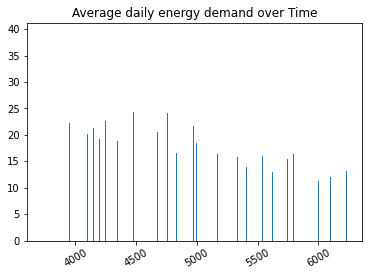

In [28]:
plt.bar(demand_df['TOTALDEMAND'], demand_df['Maximum temperature (°C)']
        )

plt.xticks(rotation=30)
plt.title('Average daily energy demand over Time')

plt.show()

In [9]:
Data_to_Analyze.dtypes

REGION                                object
SETTLEMENTDATE                        object
TOTALDEMAND                          float64
PRICECATEGORY                         object
Date                                  object
Month                                 object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am cloud amount (oktas)               int64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)              int64
3pm cloud 

In [10]:
max_demand_value = Data_to_Analyze['TOTALDEMAND'].max()
max_demand_value

8196.83

In [11]:
min_demand_value = Data_to_Analyze['TOTALDEMAND'].min()
min_demand_value

2708.53

In [12]:
Daily_demand_by_weather = Data_to_Analyze.groupby('Date').mean()
Daily_demand_by_weather

,TOTALDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
Date,,,,,,,,,,,,,,,
1/01/2021,3954.327021,15.6,29.9,0.0,2.8,9.3,31.0,19.2,77.0,6,1018.8,28.1,43,5.0,1015.3
1/02/2021,4670.888333,13.4,20.3,0.0,7.4,1.6,33.0,16.9,76.0,7,1012.8,19.4,69,7.0,1011.9
1/03/2021,4483.006042,13.8,21.7,0.0,6.4,6.3,44.0,16.6,72.0,6,1012.3,19.7,67,6.0,1012.2
1/04/2021,4794.322292,12.4,29.9,0.0,4.4,10.8,20.0,14.4,86.0,1,1024.3,28.7,30,3.0,1021.6
1/05/2021,4199.075625,11.2,24.6,0.0,5.4,7.1,33.0,14.9,63.0,3,1027.3,24.2,35,7.0,1024.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/04/2021,4539.436667,13.8,17.3,6.2,6.4,7.9,35.0,15.2,59.0,5,1010.0,15.7,62,6.0,1009.6
9/05/2021,4138.748333,11.0,20.5,0.4,0.0,7.1,28.0,13.7,97.0,6,1018.4,19.5,45,3.0,1014.9
9/06/2021,5776.988958,7.8,14.7,4.0,1.6,0.5,67.0,9.7,83.0,7,1010.7,12.3,86,8.0,1008.8


In [13]:
Daily_demand_by_weather = Data_to_Analyze.groupby('Month').mean()
Daily_demand_by_weather

,TOTALDEMAND,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
Month,,,,,,,,,,,,,,,
01,4540.319280,15.441829,25.225891,2.840619,6.744586,7.421318,35.036136,18.722260,67.864829,5.644923,1015.071688,22.899731,54.652993,4.677202,1013.330935
02,4640.496734,14.882143,24.546429,0.328571,6.600000,7.239286,35.250000,17.942857,66.428571,5.714286,1014.114286,23.096429,50.357143,5.142857,1012.485714
03,4557.335981,13.612903,22.029032,1.767742,4.245161,5.206452,29.967742,15.787097,78.903226,5.903226,1017.890323,20.445161,59.290323,5.483871,1016.641935
04,4714.065354,11.863333,20.213333,1.233333,3.813333,5.310000,30.733333,14.753333,69.866667,4.500000,1020.370000,18.683333,55.033333,5.166667,1018.330000
05,4991.513387,8.945161,17.770968,2.141935,2.825806,4.677419,32.161290,11.735484,76.548387,4.548387,1022.809677,16.654839,55.709677,5.266667,1020.630000
06,5339.133354,7.700000,15.336667,1.460000,1.790000,3.523333,34.966667,10.256667,84.666667,5.200000,1018.726667,14.360000,65.400000,5.633333,1016.770000
07,5576.248044,7.626667,14.296667,1.075862,2.167742,4.022581,40.103448,9.603333,77.433333,5.161290,1012.180000,13.222581,61.580645,5.709677,1010.451613
08,5025.986848,8.512903,16.364516,1.600000,3.225806,5.516129,37.451613,11.161290,73.419355,4.677419,1020.433333,15.348387,53.000000,5.322581,1017.900000


In [ ]:
sns.boxplot(x="TOTALDEMAND", y="Maximum temperature (°C)", data=Data_to_Analyze)

In [ ]:
Daily_demand_by_weather.plot(title="Energy Demand")
plt.ylabel("Demand")
plt.show()

In [ ]:
# Enlarge the figure shape and font size
plt.rcParams["figure.figsize"] = (15, 7) # Larger figure size
plt.rc('font', size=14) # fontsize

sample = Data_to_Analyze.sample(100) # Sample size is set to 200

# Basic scatterplot
plt.scatter(x=Data_to_Analyze['TOTALDEMAND'], 
            y=Data_to_Analyze['Maximum temperature (°C)'],
            s=100, # s determinines the size of the markers
            alpha=0.5, # alpha determines the opacity
            c='blue', # this determines the colour
            label='Maximum Temperature vs Total Energy Demand' # the label of the plot if a legend is used
           )
plt.grid()
plt.xlabel('Total Demand')
plt.ylabel('Maximum Temperature')
plt.title("Maximum Temperature vs Total Energy Demand")
plt.legend()

plt.show()

In [ ]:
sns.boxplot(x=Daily_demand_by_weather['TOTALDEMAND'], 
            y=Daily_demand_by_weather['Maximum temperature (°C)'])
sns.show()

NameError: name 'Daily_demand_by_weather' is not defined

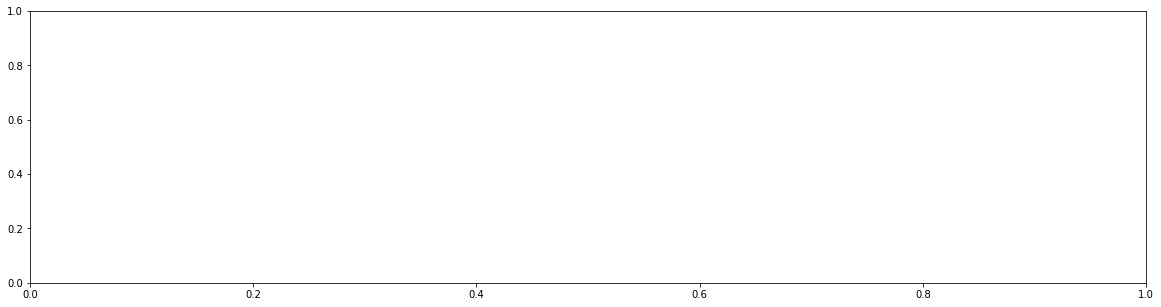

In [29]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(Daily_demand_by_weather.Date, Daily_demand_by_weather['Maximum temperature (°C)'], color = 'tab:orange')
ax1.plot(Daily_demand_by_weather.Date, Daily_demand_by_weather['Minimum temperature (°C)'], color = 'tab:pink')
ax1.set_ylabel('Temperature')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(Daily_demand_by_weather['Date'],Daily_demand_by_weather['TOTALDEMAND'],color = 'tab:blue')
ax2.set_ylabel('Total Energy Demand',color = 'tab:blue')
ax2.legend(bbox_to_anchor=(0.0, 1.02, 1.0, 0.102))
plt.title('Energy Consumption and Temperature')
fig.tight_layout()
plt.show()

In [ ]:
# Create a summary dataframe with groupby and agg
demand_df = Data_to_Analyze[['Month', 'TOTALDEMAND']].groupby('Month').agg('mean')
demand_df.head()


In [ ]:
plt.bar(demand_df.index,
        demand_df['TOTALDEMAND'])

plt.xticks(rotation=30)
plt.title('Average daily energy demand over Time')

plt.show()